# Chapter 5. 서포트 벡터 머신

## 5.1 선형 SVM 분류

**SVM 분류기**
- 클래스 사이에 가장 폭이 넓은 도로를 찾는다
- Large Margin Classification이라고도 함
- 특성의 스케일에 민감

**서포트 벡터**
- 두 클래스를 구분하는 도로의 경계에 위치한 샘플

**Hard Margin Classification vs Soft Margin Classification**
- Hard : 모든 샘플이 도로 바깥쪽에 올바르게 분류되어 있다(이상치에 민감, 하드마진이 없는 경우도 있다)
- Soft : 도로의 폭을 넓게 유지하는것과 마진 오류 사이의 균형을 추구

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

In [3]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

In [4]:
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [5]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

## 5.2 비선형 SVM 분류

선형적으로 구분할 수 없는 데이터셋도 차수를 추가하면 선형적으로 구분할 수 있다.

In [6]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [7]:
X, y = make_moons(n_samples=100, noise=0.15)

In [8]:
polynomial_svm_clf = Pipeline([
    ("poly_featuers", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

In [9]:
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_featuers', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [10]:
import matplotlib.pyplot as plt

In [11]:
def plot_datasets(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)

In [12]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

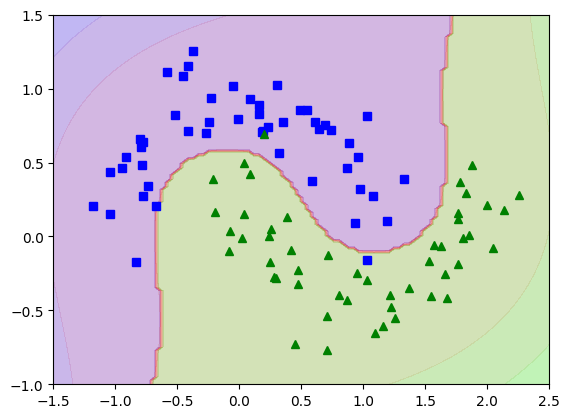

In [13]:
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.show()

In [14]:
# 다항식 커널
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

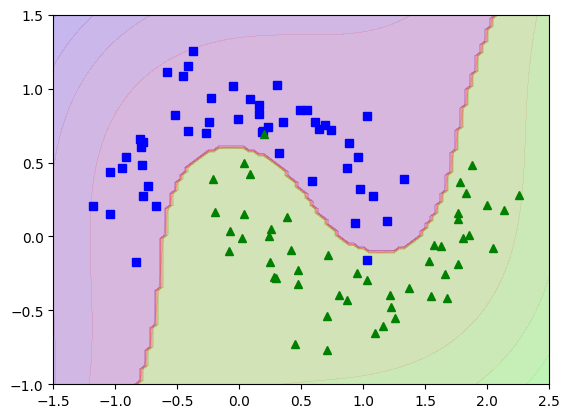

In [15]:
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.show()

**유사도 특성**
- 각 샘플이 특정 랜드마크와 얼마나 닮았는지 측정하는 유사도 함수로 계산한 특성을 추가   
- 가우시안 방사 기저 함수
$\phi_\gamma(x, l) = exp(-\gamma \left \|  x-l \right \|^2)$
- 랜드마크 선택 방법: 데이터셋에 있는 모든 샘플 위치에 설정
- 차원이 매우 커지고 변환된 훈련 세트가 선형적으로 구분될 가능성 높다
- 단점 : 특성의 개수가 훈련 샘플의 개수만큼 늘어남

In [16]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

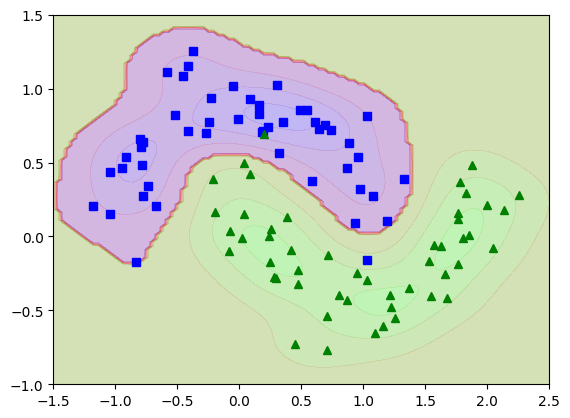

In [17]:
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plt.show()

**계산 복잡도**    
- LinearSVC: 선형 svm에 최적화된 liblinear 라이브러리 기반, 커널 트릭을 지원하지 않지만 훈련 샘플과 특성 수에 선형적인 시간 복잡도
- SVC: 커널 트릭 알고리즘이 구현된 libsvm 라이브러리 기반, 시간복잡도는 O(m^2xn) ~ O(m^3xn) 사이. 샘플 수가 늘어나면 엄청나게 느려짐. 희소 특성인 경우에 잘 확장됨.

In [18]:
X = 2 * np.random.rand(100, 1)
y = 3 * X + 4 + np.random.randn(100, 1)

In [19]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVR(epsilon=1.5)

In [26]:
svm_reg.coef_, svm_reg.intercept_

(array([2.75494415]), array([3.99149455]))

In [23]:
X_edge = [[0], [2]]
y_edge = svm_reg.predict(X_edge)

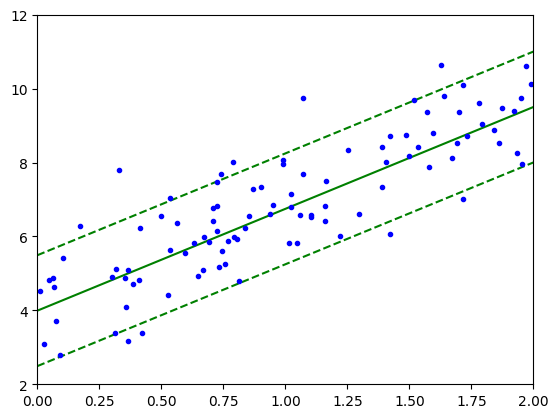

In [29]:
plt.plot(X_edge, y_edge, "g-")
plt.plot(X_edge, y_edge+1.5, "g--")
plt.plot(X_edge, y_edge-1.5, "g--")
plt.plot(X, y, "b.")
plt.axis([0, 2, 2, 12])
plt.show()

In [63]:
X = 4 * np.random.rand(100, 1) - 2
y = 2*X**2 - 2 + np.random.randn(100, 1)

In [64]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=1.5)
svm_poly_reg.fit(X, y.ravel())

SVR(C=100, degree=2, epsilon=1.5, kernel='poly')

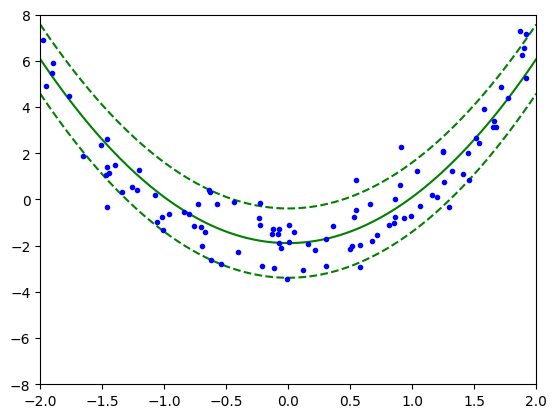

In [65]:
x1s = np.linspace(-2, 2, 100).reshape(-1, 1)
y1s = svm_poly_reg.predict(x1s)
plt.plot(x1s, y1s, "g-")
plt.plot(x1s, y1s + svm_poly_reg.epsilon, "g--")
plt.plot(x1s, y1s - svm_poly_reg.epsilon, "g--")
plt.plot(X, y, "b.")
plt.axis([-2, 2, -8, 8])
plt.show()

## 5.4 SVM 이론

- w : 특성의 가중치 벡터
- b : 편향

결정 함수: $w^Tx+b = w_1x_1+ ... + w_nx_n+b$   
$\hat{y} = \begin{cases}
0,\;if\;w^Tx+b<0\\
1,\;if\;w^tx+\geq0\
\end{cases}$

결정 함수의 기울기 = $\left\| w \right\|$   
$결정함수의\;기울기 \propto \dfrac{1}{마진에서\;결정경계까지의\;거리}$

**하드 마진 선형 svm 분류기의 목적함수**   
$minimize_{w, b} \dfrac{1}{2}w^Tw$   
단, i=1, 2, 3 ... m 일 때, $t^{(i)}(w^Tx^{(i)}+b)\geq1$

**소프트 마진 선형 svm 분류기의 목적함수**   
슬랙 변수 $\zeta^{(i)}$: i번째 샘플이 얼마나 마진을 위반할 지 결정한다.
- 마진 오류를 최소화 하기 위해 슬랙 변수의 값을 최소화
- 마진을 최대한 크게 하기 위해 $\dfrac{1}{2}w^Tw$을 최소화
- 하이퍼파라미터 C로 둘 사이의 트레이드 오프 조정   
$minimize_{w, b} \dfrac{1}{2}w^Tw + C \sum_{i=1}^m\zeta^{(i)}$   
단, i=1, 2, 3 ... m 일 때, $t^{(i)}(w^Tx^{(i)}+b)\geq1-\zeta^{(i)}$이고 $\zeta^{(i)}\geq0$